In [1]:
import astropy.units as u
rho = u.def_unit("rho")
p_eps = ϵ = 0.1
p_grphi = radial_electric_field = -5e3 * u.V / rho
p_gr2phi = radial_electric_field_gradient = -2e4 * u.V / rho**2
# gr2phi is defined as Psi' (Phi'/Psi')'
p_q = safety_factor = -3.0
r0 = major_radius = 3.0 * u.m
a0 = minor_radius = rho_scale_length = 1.0 * u.m
e0 = axial_elongation = 1.0
bt0 = axial_toroidal_field = -3 * u.T
q0 = axial_safety_factor = -3

For some reason they define $\nabla T_i(\rho) = - T_i(\rho) / (2 a_0)$. Why?! Scale length thing?

They also define the pressure gradient as $\nabla p_i (\rho) = - T_i(\rho) n_i(\rho) / a_0$.

In [2]:
# <B**2>
p_b2 = bt0 ** 2 * (1 + 0.5 * p_eps ** 2)

In [3]:
# <B**-2>, u = T ** -1
p_bm2 = (1.0 + 1.5 * p_eps **2) / bt0 ** 2

In [4]:
# <E * B>,       u = V T / m
p_eb = 0.1 * bt0 / (2.0 * np.pi * r0)
# missing a volt...

# Note: the problem at the far boundary might have to do with the electric field at the sheath/edge, which I completely neglected!

In [5]:
M = 10
p_fm = np.zeros(10)
i = np.arange(1, M+1)
C1 = np.sqrt(1 - p_eps**2)
if p_eps > 0:
    p_fm[:] = i * ((1 - C1)/p_eps)**(2 * i) * (1 + i * C1) / (C1 ** 3 * (p_q * r0)**2)    
p_fm

array([6.28234850e-05, 4.73150238e-07, 2.37665789e-09, 9.95006275e-12,
       3.74941822e-14, 1.31874109e-16, 4.41752384e-19, 1.42696287e-21,
       4.48144486e-24, 1.37615712e-26])

In [6]:
p_ft = 1.46 * np.sqrt(p_eps)

In [7]:
# <grad(ρ)**2 / B **2>    #ρ**2 / m**2 / T**2
p_grbm2 = 1 / bt0**2

In [8]:
# <n * grad(Θ)>   # 1/m
p_ngrth = 1.0 / (p_q * r0)

In [9]:
from plasmapy.plasma.simplefluxsurface import SimpleFluxSurface

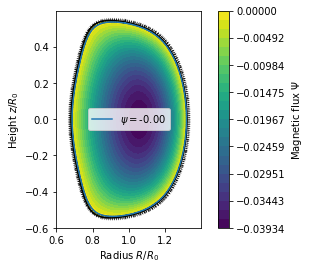

In [10]:
import plasmaboundaries

from plasmapy.plasma.symbolicequilibrium import SymbolicEquilibrium
# params = {'aspect_ratio': 0.32, 'A': -0.155, 'elongation': 1.7, 'triangularity': 0.33}
params = {'aspect_ratio': 0.32, 'A': -0.155, 'elongation': 1.7, 'triangularity': 0}
assert params["triangularity"] <= 0.841  # for convex plasma surfaces
eq = SymbolicEquilibrium(**params, B0=5.3, config="non-null")
ax = eq.plot((0.6, 1.4, 0.001), (-0.6, 0.6, 0.001), vmax=-0)
for psi_value in [-0.001]:
    fs = eq.get_flux_surface(psi_value)
    fs.plot(ax, B=True, n=True)

## On a grid

In [22]:
params["aspect_ratio"]
params["elongation"]

1.7

In [11]:
sfs = SimpleFluxSurface(
    params["aspect_ratio"],
    safety_factor=1,
    major_radius=6.2 * u.m,
    minor_radius=2 * u.m,
    axial_elongation=params["elongation"],
    axial_toroidal_field=5.3 * u.T,
    q0 = 3.0,
    axial_safety_factor = 3,
)

In [12]:
sfs.F_m(10)

<Quantity [1.60854507e-03, 1.29124835e-04, 6.94136575e-06, 3.11519443e-07,
           1.25939758e-08, 4.75448717e-10, 1.71000338e-11, 5.93185663e-13,
           2.00085769e-14, 6.59979138e-16] 1 / m2>

In [13]:
names = [name for name in set(dir(sfs) + dir(fs)) if not (name.startswith("_" or name.endswith("_")))]
fs_vals = [getattr(fs, name, NotImplemented) for name in names]
sfs_vals = [getattr(sfs, name, NotImplemented) for name in names]

import pandas as pd
df = pd.DataFrame({"fs": fs_vals, "sfs": sfs_vals}, index=names).sort_index()
df

,fs,sfs
B2,"[32.95299826347937 T2, 33.42867930941049 T2, 3...",NotImplemented
BDotNablaThetaFSA,6.0683618060198246 T / m,NotImplemented
Bmag,"[5.740470212750814 T, 5.781753999385523 T, 5.8...",NotImplemented
Bmax,8.169037869434668 T,NotImplemented
Bmin,4.264369446657015 T,NotImplemented
Bp,"[0.16207035736827996 T, 0.16027879434133704 T,...",NotImplemented
Bphivals,"[5.738181895229698 T, 5.779531989486258 T, 5.8...",NotImplemented
Bprimervals,"[0.34507913383023686 T / m, 0.3557831173067420...",NotImplemented
Bprimezvals,"[0.6004263102196068 T / m, 0.5922969153562303 ...",NotImplemented
Brvals,"[-0.1599602381245597 T, -0.15853964923726308 T...",NotImplemented


In [14]:
sfs.F_m3

<Quantity [1.60854507e-03, 1.29124835e-04, 6.94136575e-06] 1 / m2>

In [19]:
fs.F_m3

<Quantity [-1.01253935e-10,  5.60630210e-08,  2.23891961e-09] 1 / m2>

In [20]:
fs.F_m3 / sfs.F_m3

<Quantity [-6.29475275e-08,  4.34176903e-04,  3.22547419e-04]>

In [16]:
df[df.sfs != NotImplemented]

,fs,sfs
F_m,<bound method FluxSurface.F_m of <plasmapy.pla...,<bound method SimpleFluxSurface.F_m of <plasma...
F_m3,"[-1.0125393507255486e-10 1 / m2, 5.60630210216...","[0.0016085450698298937 1 / m2, 0.0001291248351..."
Fhat,2.090397078400551,3.125
a0,NotImplemented,2.0 m
bt0,NotImplemented,5.3 T
e0,NotImplemented,1.7
fsa_B2,39.47093357117998 T2,29.528207999999996 T2
fsa_invB2,0.0312722934922094 1 / T2,0.04106799572801709 1 / T2
gamma,0.06741767072714916 1 / m,0.16129032258064516 1 / m
grbm2,1.0363203539246015 1 / T2,0.0355998576005696 1 / T2


`grbm2` is much larger on fs than on sfs. Why?

```python
        return self.flux_surface_average(self.GradRho2 / self.B2) / u.T ** 2
```

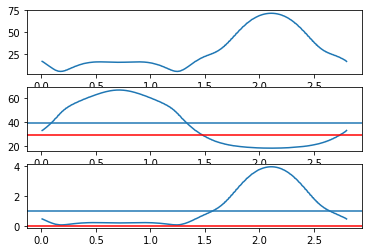

In [17]:
fig, axes = plt.subplots(3)
axes[0].plot(fs.lp, fs.GradRho2)
axes[1].plot(fs.lp, fs.B2)
axes[1].axhline(fs.fsa_B2.si.value)
axes[1].axhline(sfs.fsa_B2.si.value, color="red")
axes[2].plot(fs.lp, fs.GradRho2/fs.B2)
axes[2].axhline(fs.grbm2.si.value)
axes[2].axhline(sfs.grbm2.si.value, color="red")